#### Doc2vec learning and plot using UMAP

# Data Exploration

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### load report data

In [2]:
pone = pd.read_csv('../../Data/Experiment/Plosone/pone_final.csv',index_col='Unnamed: 0')

In [3]:
pone_original = pd.read_csv('../../Data/Experiment/Plosone/pone_final.csv',index_col='Unnamed: 0')

### load doc2vec data

In [66]:
Total_train =np.load('../../Data/Experiment/Plosone/pone_BERT.npy',allow_pickle=True)

In [67]:
pone['Vector'] = list(Total_train)

In [68]:
pone

,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename,Vector
0,2016,"1,25(OH)2D3 and VDR Signaling Pathways Regulat...",\n\nBackground\nThe objective of this study is...,"[[], [], [], [], [], [], [], []]","[['aff001'], ['aff001', 'cor001'], ['aff001'],...","['1 Department of Ophthalmology, The Affiliate...","['Medicine and health sciences', 'Anatomy', 'B...",/data02/plos/pone/journal.pone.0164717.xml,"[-0.46586323, 0.04045162, 0.13959719, -0.03819..."
1,2018,"A non-invasive, quantitative study of broadban...","\nCurrently, non-invasive methods for studying...","[['Data curation', 'Formal analysis', 'Investi...","[['aff001', 'cor001'], ['aff001'], ['aff002'],...",['1 Department of Psychology and Center for Ne...,"['Engineering and technology', 'Signal process...",/data02/plos/pone/journal.pone.0193107.xml,"[-0.30758682, -0.041834213, 0.2826488, 0.02133..."
2,2016,The Effects of Financial Education on Impulsiv...,"\nDelay discounting, as a behavioral measure o...","[[], [], [], []]","[['aff001', 'cor001'], ['aff001'], ['aff002'],...","['1 Department of Psychology, Utah State Unive...","['Social sciences', 'Psychology', 'Personality...",/data02/plos/pone/journal.pone.0159561.xml,"[-0.42557415, -0.07827128, 0.024930561, 0.1821..."
3,2016,Root-Zone Warming Differently Benefits Mature ...,\nSub-optimal temperature extensively suppress...,"[[], [], [], []]","[['aff001'], ['aff001'], ['aff001'], ['cor001'...",['Beijing Key Laboratory of Growth and Develop...,"['Medicine and health sciences', 'Vascular med...",/data02/plos/pone/journal.pone.0155298.xml,"[-0.45210573, -0.038519345, 0.3561716, 0.10260..."
4,2017,A hypomorphic PIGA gene mutation causes severe...,\nMutations in genes involved in glycosylphosp...,"[[], [], [], [], [], [], [], [], [], [], []]","[['aff001'], ['aff002'], ['aff001'], ['aff001'...","['1 Division of Hematology, Department of Medi...","['Biology and life sciences', 'Cell biology', ...",/data02/plos/pone/journal.pone.0174074.xml,"[-0.3506312, 0.035694893, 0.14102796, -0.10174..."
...,...,...,...,...,...,...,...,...,...
70382,2018,Measurement agreement of the self-administered...,\nBefore organizing mixed-mode data collection...,"[['Formal analysis', 'Investigation', 'Methodo...","[['aff001', 'aff002', 'cor001'], ['aff001'], [...","['1 Department Epidemiology and public health,...","['Medicine and health sciences', 'Mental healt...",/data02/plos/pone/journal.pone.0197434.xml,"[-0.38700435, 0.020375594, 0.17568012, 0.14825..."
70383,2019,ST analysis of the fetal electrocardiogram – C...,"\nIn their paper, Andriessen at al present a v...","[['Conceptualization', 'Formal analysis', 'Wri...","[['aff001'], ['aff002'], ['aff003', 'currentaf...","['1 Department of Pediatrics, Institute of Cli...","['Medicine and health sciences', 'Cardiology',...",/data02/plos/pone/journal.pone.0221210.xml,"[-0.2587618, 0.13863316, 0.07161839, -0.132532..."
70384,2018,Commentary on “The number of undocumented immi...,\n“The number of undocumented immigrants in th...,"[['Writing – original draft'], ['Methodology',...","[['aff001'], ['aff001'], ['aff002'], ['aff001'...","['1 Migration Policy Institute, Washington, D....","['Social sciences', 'Human geography', 'Housing']",/data02/plos/pone/journal.pone.0204199.xml,"[-0.40421587, 0.030209724, 0.19800442, 0.05763..."
70385,2019,Why -aVF can be used in STAN as a proxy for sc...,\nThe conclusion of our recent paper that perf...,"[['Conceptualization', 'Data curation', 'Forma...","[['aff001', 'aff002', 'cor001'], ['aff003', 'a...","['1 Department of Biomedical Engineering, Maas...","['Medicine and health sciences', 'Medical devi...",/data02/plos/pone/journal.pone.0221220.xml,"[-0.3383581, 0.04168417, 0.11731322, -0.115014..."


In [69]:
#Korean - English Institute set
subject_list={'Biology and life sciences','Computer and information sciences','Earth sciences','Ecology and environmental sciences','Engineering and technology','Medicine and health sciences','People and places','Physical sciences','Research and analysis methods','Science policy','Social sciences'}






### Calculating mean vector

In [70]:
# index number of each research institute
index_by_subject = {}
for subject in subject_list:
    print(subject)
    index_by_subject[subject] = list(pone[pone['Discipline'].apply(lambda x: True if subject in x else False)].index)


Biology and life sciences
Ecology and environmental sciences
Social sciences
Earth sciences
Medicine and health sciences
Research and analysis methods
Engineering and technology
People and places
Science policy
Computer and information sciences
Physical sciences


In [71]:
index_by_subject['Social sciences']

[2,
 18,
 45,
 47,
 61,
 74,
 94,
 112,
 121,
 163,
 203,
 229,
 232,
 272,
 294,
 320,
 337,
 385,
 416,
 429,
 431,
 440,
 458,
 478,
 491,
 521,
 541,
 546,
 556,
 567,
 588,
 604,
 681,
 687,
 701,
 702,
 703,
 726,
 775,
 797,
 836,
 837,
 847,
 858,
 870,
 877,
 900,
 910,
 915,
 920,
 928,
 929,
 932,
 934,
 943,
 950,
 957,
 1002,
 1030,
 1032,
 1040,
 1078,
 1087,
 1092,
 1105,
 1129,
 1130,
 1144,
 1152,
 1175,
 1191,
 1207,
 1213,
 1241,
 1250,
 1257,
 1295,
 1297,
 1309,
 1324,
 1329,
 1335,
 1344,
 1358,
 1408,
 1467,
 1474,
 1492,
 1517,
 1577,
 1616,
 1621,
 1624,
 1633,
 1675,
 1680,
 1736,
 1782,
 1842,
 1853,
 1857,
 1866,
 1939,
 1940,
 1941,
 1983,
 2005,
 2020,
 2056,
 2079,
 2124,
 2129,
 2194,
 2234,
 2244,
 2278,
 2280,
 2300,
 2306,
 2384,
 2420,
 2432,
 2455,
 2461,
 2486,
 2540,
 2546,
 2574,
 2591,
 2624,
 2633,
 2634,
 2635,
 2677,
 2689,
 2704,
 2709,
 2715,
 2739,
 2746,
 2774,
 2776,
 2801,
 2869,
 2895,
 2932,
 2944,
 2968,
 2979,
 3002,
 3008,
 3031,
 

In [14]:
# mean_per_inst = {}
# for i, name in enumerate(unique_affiliation_classified_government): 
#     vecs = np.array(emb_vectors[index_by_affiliation[name][0]])
#     mean_cordinate = np.mean(vecs,axis=0)
#     mean_per_inst.update({name:mean_cordinate})

In [15]:
# emb_vector_total = np.append(emb_vectors,np.array([x for x in mean_per_inst.values()]),axis=0)

In [27]:
# kinu_list = []
# for y in set(report['Year']):
#     kinu_list.append(list(np.mean(report[(report['Institute'] == '통일연구원')&(report['Year']==y)]['Vector'])))

In [28]:
# time_list = []
# for inst in unique_affiliation_classified_government:
#     for y in set(report['Year']):
#         mean = np.mean(report[(report['Institute'] == inst)&(report['Year']==y)]['Vector'])
#         if type(mean) == type(np.array(1)):
#             print(y)
#             time_list.append(mean)

In [29]:
# time_list = np.array(time_list)

In [30]:
# emb_vector_total = np.append(emb_vectors,np.array([x for x in mean_per_inst.values()]),axis=0)

In [31]:
# emb_vector_total = np.append(emb_vector_total,np.array(time_list),axis=0)

# Drawing umap

In [11]:
import umap.umap_ as umap

In [12]:
import matplotlib.font_manager as fm

In [13]:
fontprop=fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=19)

In [14]:
font_name = fontprop

In [73]:
import matplotlib.pyplot as plt
embedding1 = umap.UMAP(n_neighbors=20,
                        min_dist=0.1, 
                        metric='cosine',random_state=9000).fit_transform(Total_train)

In [20]:
sub_name = []
for i in subject_list:
    sub_name.append(i)

In [21]:
sub_name = ['Earth sciences',
 'Ecology and environmental sciences',
 'Computer and information sciences',
 'Engineering and technology',
 'Physical sciences',
 'Science policy',
 'Medicine and health sciences',
 'Research and analysis methods',
'Biology and life sciences',
 'People and places',
'Social sciences']


In [47]:
index_by_subject['Social sciences']

[2,
 18,
 45,
 47,
 61,
 74,
 94,
 112,
 121,
 163,
 203,
 229,
 232,
 272,
 294,
 320,
 337,
 385,
 416,
 429,
 431,
 440,
 458,
 478,
 491,
 521,
 541,
 546,
 556,
 567,
 588,
 604,
 681,
 687,
 701,
 702,
 703,
 726,
 775,
 797,
 836,
 837,
 847,
 858,
 870,
 877,
 900,
 910,
 915,
 920,
 928,
 929,
 932,
 934,
 943,
 950,
 957,
 1002,
 1030,
 1032,
 1040,
 1078,
 1087,
 1092,
 1105,
 1129,
 1130,
 1144,
 1152,
 1175,
 1191,
 1207,
 1213,
 1241,
 1250,
 1257,
 1295,
 1297,
 1309,
 1324,
 1329,
 1335,
 1344,
 1358,
 1408,
 1467,
 1474,
 1492,
 1517,
 1577,
 1616,
 1621,
 1624,
 1633,
 1675,
 1680,
 1736,
 1782,
 1842,
 1853,
 1857,
 1866,
 1939,
 1940,
 1941,
 1983,
 2005,
 2020,
 2056,
 2079,
 2124,
 2129,
 2194,
 2234,
 2244,
 2278,
 2280,
 2300,
 2306,
 2384,
 2420,
 2432,
 2455,
 2461,
 2486,
 2540,
 2546,
 2574,
 2591,
 2624,
 2633,
 2634,
 2635,
 2677,
 2689,
 2704,
 2709,
 2715,
 2739,
 2746,
 2774,
 2776,
 2801,
 2869,
 2895,
 2932,
 2944,
 2968,
 2979,
 3002,
 3008,
 3031,
 

In [65]:
for i in index_by_subject['Computer and information sciences']:
    if embedding1[i][0]<0:
        print(pone['Title'][i]+'\n')
        
        print(pone['Discipline'][i])
        print("=====================================================")

The influences of smartphone use on the status of the tear film and ocular surface

['Computer and information sciences', 'Computer vision']
A comparison of radiological descriptions of spinal cord compression with quantitative measures, and their role in non-specialist clinical management

['Computer and information sciences', 'Data compression']
Blue-Black or White-Gold? Early Stage Processing and the Color of 'The Dress'

['Computer and information sciences', 'Computer networks', 'Internet']
Comparative effectiveness and safety of interventions for acute diarrhea and gastroenteritis in children: A systematic review and network meta-analysis

['Computer and information sciences', 'Network analysis']
Phylogenetic diversity, antimicrobial susceptibility and virulence gene profiles of Brachyspira hyodysenteriae isolates from pigs in Germany

['Computer and information sciences', 'Data management', 'Taxonomy', 'Evolutionary systematics', 'Phylogenetics']
Factors associated with unsuccess

In [62]:
for i in index_by_subject['Computer and information sciences'][:200]:
    if embedding1[i][0]<0:
        print(pone['Title'][i])
        print("========================")

The influences of smartphone use on the status of the tear film and ocular surface
A comparison of radiological descriptions of spinal cord compression with quantitative measures, and their role in non-specialist clinical management
Blue-Black or White-Gold? Early Stage Processing and the Color of 'The Dress'
Comparative effectiveness and safety of interventions for acute diarrhea and gastroenteritis in children: A systematic review and network meta-analysis
Phylogenetic diversity, antimicrobial susceptibility and virulence gene profiles of Brachyspira hyodysenteriae isolates from pigs in Germany
Factors associated with unsuccessful treatment outcome in tuberculosis patients among refugees and their surrounding communities in Gambella Regional State, Ethiopia
Extensive Genetic Diversity of HIV-1 in Incident and Prevalent Infections among Malaysian Blood Donors: Multiple Introductions of HIV-1 Genotypes from Highly Prevalent Countries
Characterising non-urgent users of the emergency dep

In [54]:
for i in index_by_subject['Social sciences']:
    if embedding1[i][0]>0:
        print(pone['Discipline'][i])
        print("========================")

['Social sciences', 'Psychology', 'Personality', 'Personality differences']
['Social sciences', 'Psychology', 'Cognitive psychology', 'Reasoning']
['Social sciences', 'Psychology', 'Behavior']
['Social sciences', 'Sociology', 'Communications']
['Social sciences', 'Sociology', 'Criminology', 'Crime', 'Rape and sexual assault']
['Social sciences', 'Linguistics', 'Phonology', 'Syntax']
['Social sciences', 'Psychology', 'Cognitive psychology', 'Motivation']
['Social sciences', 'Psychology', 'Sensory perception', 'Vision']
['Social sciences', 'Linguistics', 'Language acquisition']
['Social sciences', 'Psychology', 'Cognitive psychology', 'Language']
['Social sciences', 'Economics']
['Social sciences', 'Psychology', 'Collective human behavior']
['Social sciences', 'Sociology', 'Sexual and gender issues']
['Social sciences', 'Psychology', 'Cognitive psychology', 'Motivation']
['Social sciences', 'Psychology', 'Emotions', 'Anxiety']
['Social sciences', 'Sociology', 'Culture']
['Social sciences

In [39]:
for i in index_by_subject['Social sciences']:
    if 'Computer and information sciences' in pone['Discipline'][i]:
        print(pone['Discipline'][i])

In [30]:
for i in index_by_subject['Biology and life sciences']:
    if (embedding1[i][0]>2):
        print(pone['Discipline'][i])

['Biology and life sciences', 'Cell biology', 'Cellular types', 'Animal cells', 'Stem cells', 'Induced pluripotent stem cells']
['Biology and life sciences', 'Microbiology', 'Microbial genomics', 'Microbiome']
['Biology and life sciences', 'Cell biology', 'Signal transduction', 'Cell signaling', 'Signaling cascades', 'Stress signaling cascade']
['Biology and life sciences', 'Biochemistry', 'Metabolism', 'Carbohydrate metabolism', 'Glucose metabolism']
['Biology and life sciences', 'Population biology', 'Population metrics', 'Birth rates']
['Biology and life sciences', 'Cell biology', 'Cell processes', 'Cell death', 'Apoptosis']
['Biology and life sciences', 'Biochemistry', 'Lipids', 'Fats']
['Biology and life sciences', 'Organisms', 'Eukaryota', 'Animals', 'Invertebrates', 'Plankton', 'Phytoplankton']
['Biology and life sciences', 'Genetics', 'Genomics', 'Genome analysis', 'Sequence assembly tools']
['Biology and life sciences', 'Biochemistry', 'Hormones', 'Peptide hormones', 'Natriure

[(0.6941176470588235, 0.34901960784313724, 0.1568627450980392, 1.0), (1.0, 1.0, 0.6, 1.0), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509, 1.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098, 1.0), (1.0, 0.4980392156862745, 0.0, 1.0), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883, 1.0), (0.984313725490196, 0.6039215686274509, 0.6, 1.0), (0.2, 0.6274509803921569, 0.17254901960784313, 1.0), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1.0), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1.0), (0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1.0)]
Earth sciences
Ecology and environmental sciences
Computer and information sciences
Engineering and technology
Physical sciences
Science policy
Medicine and health sciences
Research and analysis methods
Biology and life sciences
People and places
Social sciences


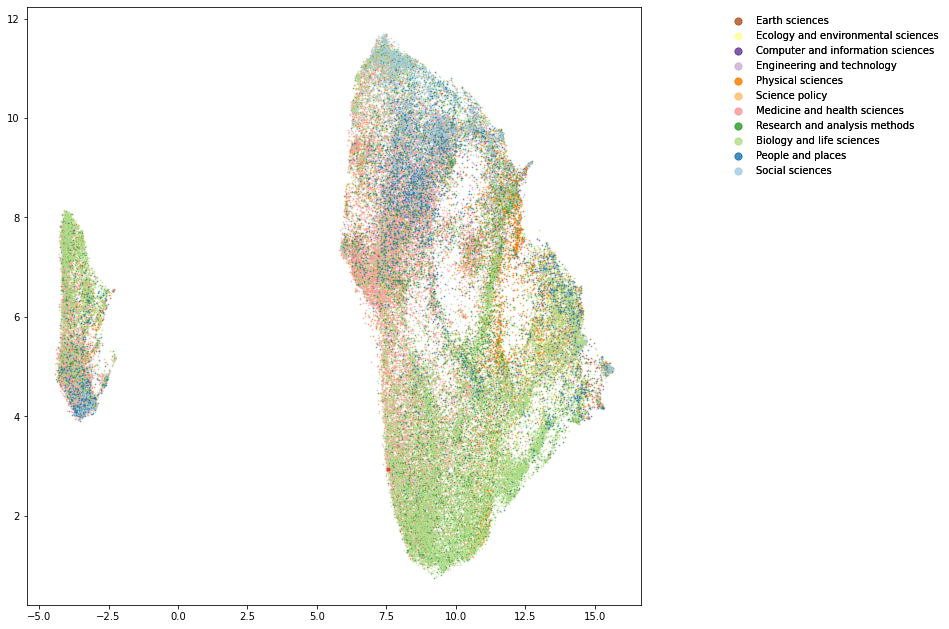

In [74]:

plt.rcParams["figure.figsize"]=(11,11)


c_lst=[plt.cm.Paired(a) for a in np.linspace(1.0, 0, 11)]
# c_lst[-1] = 'blue'
# c_lst[-2] = 'lightblue'
print(c_lst)
# c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 7)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.18, 0.35, 5)]
# # c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(0.4, 0, 5)]
# c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 5)]
# c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(0.9, 0.5,5)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
# c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]

# c_lst = ['red','purple','green','blue','orange']
for i, subject in enumerate(sub_name):
    print(subject)
    xs = embedding1[index_by_subject[subject]][:,0]
    ys = embedding1[index_by_subject[subject]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=subject,alpha=0.6)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=subject,alpha=0.6)]

        
xs = embedding1[13][0]
ys = embedding1[13][1]
scatters = scatters+[plt.scatter(xs, ys, s=10,color='red',label=subject,alpha=0.6)]
#=============================================================
# xs = embedding1[index_by_affiliation['통일연구원']][:,0]
# ys = embedding1[index_by_affiliation['통일연구원']][:,1] 
# scatters=[plt.scatter(xs, ys, s=9,color=c_lst[i],label=name,alpha=0.5)]

# xs = embedding1[22+23124][0]
# ys = embedding1[22+23124][1]
# scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[22],label=name,alpha=1)]
#=============================================================

# for i,index in enumerate(range(len(report),len(emb_vector_total))):
#     xs = embedding1[index][0]
#     ys = embedding1[index][1]
#     scatters = scatters+[plt.scatter(xs, ys, s=40,color=c_lst[i],label=name,alpha=1)]
#     if unique_affiliation_classified_government_eng[i] == 'KIET':
#         plt.text(xs - 0.3,ys+0.15, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'STEPI':
#         plt.text(xs - 0.15,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'AURI':
#         plt.text(xs - 0.1,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 4:
#         plt.text(xs - 0.25,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 5:
#         plt.text(xs - 0.3,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 6:
#         plt.text(xs - 0.35,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     else:
#         plt.text(xs - 0.15,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')

#     if unique_affiliation_classified_government_eng[i] == 'KRIHS':
#         plt.text(xs - 0.3,ys+0.1, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'KDIschool':
#         plt.text(xs - 0.5,ys-0.25, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     else:
#         plt.text(xs - 0.2,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')


# print()



# fs=17
# # plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# # plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[22])
# plt.text(-0,5.1,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[22],fontweight='bold')
# plt.text(2.2,3.3,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[0],alpha=0.6)
# # plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[13])
# plt.text(4,-1.5,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[10])
# #plt.text(4.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[5])
# plt.text(1,-3.4,"     Land\nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# plt.text(-5.1,0,"Employment\n & Labor",fontsize=fs,fontproperties=fontprop,color=c_lst[21])


# plt.text(3.7,1.8,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[8])
# plt.text(-5.1,3.3,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
# plt.text(-3,4.4,"Parenting",fontsize=fs,fontproperties=fontprop,color=c_lst[15])
# plt.text(-3,-3,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[24])
# plt.xlim(-5.5, 6.7)


# font_name =fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=14)
legend1 = plt.legend(handles=scatters[0:11],labels=sub_name,bbox_to_anchor=(1.5,1.),frameon=False,loc='upper right')        
plt.gca().add_artist(legend1)
# legend2 = plt.legend(handles=scatters[5:12],labels=unique_affiliation_classified_government_eng[5:12],bbox_to_anchor=(1.1675, 0.821),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend2)
# legend3 = plt.legend(handles=scatters[12:17],labels=unique_affiliation_classified_government_eng[12:17], bbox_to_anchor=(1.1828, 0.575),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend3)
# legend4 = plt.legend(handles=scatters[17:22],labels=unique_affiliation_classified_government_eng[17:22], bbox_to_anchor=(1.1825,0.4),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend4)
# legend5 = plt.legend(handles=scatters[22:27],labels=unique_affiliation_classified_government_eng[22:27], bbox_to_anchor=(1.155,0.225),frameon=False,prop=font_name,loc='upper right',fontsize=2)

# # legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.441,0.29),frameon=False,prop=font_name,loc='upper right')
# # plt.gca().add_artist(legend6)
# # legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.398,0.0),frameon=False,prop=font_name,loc='upper right')
# plt.axhline(y = 5, xmin = 5, xmax = 6,color = 'r', linestyle = '-')

for point in legend1.legendHandles:
    point._sizes = [50]   
# for point in legend2.legendHandles:
#     point._sizes = [50]
# for point in legend3.legendHandles:
#     point._sizes = [50]
# for point in legend4.legendHandles:
#     point._sizes = [50]
# for point in legend5.legendHandles:
#     point._sizes = [50]
# for point in legend6.legendHandles:
#     point._sizes = [50]
# for point in legend7.legendHandles:
#     point._sizes = [50]


# fg = plt.figure(1);
# ax = fg.add_subplot(1,1,1)
# ax.annotate('', xy=(1.1,0.95), xycoords='axes fraction', xytext=(1.8,0.95), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.6255), xycoords='axes fraction', xytext=(1.8,0.6255), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.38), xycoords='axes fraction', xytext=(1.8,0.38), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.15), xycoords='axes fraction', xytext=(1.8,0.15), 
#             arrowprops=dict(arrowstyle="-", color='black'))

# ax.annotate('Economy',
#             xy=(1.6, 0.9), xytext=(2., 0.9),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=30, ha='center', va='bottom')

# ax.annotate('Land use',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')

# ax.annotate('Welfare·Labor·Women',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('Public Policy',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
# #             size=14, ha='center', va='bottom')
# plt.xticks([]),plt.yticks([])
# plt.axis('off')
#plt.savefig('../../Data/Experiment/~1920/RESULT/UMAP.pdf', bbox_inches='tight')
plt.show()

In [27]:
import matplotlib.pyplot as plt
embedding2 = umap.UMAP(n_neighbors=30,
                        min_dist=0.1, 
                        metric='cosine',random_state=9000).fit_transform(emb_vector_total)

/home/balla/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


In [36]:

plt.rcParams["figure.figsize"]=(11,11)


c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 4)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 7)]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.18, 0.35, 5)]
# c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(0.4, 0, 5)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 5)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(0.9, 0.5,5)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
# c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]


for i, name in enumerate(unique_affiliation_classified_government):
    xs = embedding2[index_by_affiliation[name]][:,0]
    ys = embedding2[index_by_affiliation[name]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=name,alpha=0.6)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=name,alpha=0.6)]


#=============================================================
# xs = embedding1[index_by_affiliation['통일연구원']][:,0]
# ys = embedding1[index_by_affiliation['통일연구원']][:,1] 
# scatters=[plt.scatter(xs, ys, s=9,color=c_lst[i],label=name,alpha=0.5)]

# xs = embedding1[22+23124][0]
# ys = embedding1[22+23124][1]
# scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[22],label=name,alpha=1)]
#=============================================================

for i,index in enumerate(range(len(report),len(report)+len(unique_affiliation_classified_government))):
    xs = embedding2[index][0]
    ys = embedding2[index][1]
    scatters = scatters+[plt.scatter(xs, ys, s=120,color=c_lst[i],label=name,alpha=1)]
    if unique_affiliation_classified_government_eng[i] == 'KDI':
        plt.text(xs-0.2,ys+0.2, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    elif unique_affiliation_classified_government_eng[i] == 'STEPI':
        plt.text(xs - 0.38,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    elif unique_affiliation_classified_government_eng[i] == 'AURI':
        plt.text(xs - 0.3,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    elif len(unique_affiliation_classified_government_eng[i]) == 4:
        plt.text(xs - 0.3,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    elif len(unique_affiliation_classified_government_eng[i]) == 5:
        plt.text(xs - 0.3,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    elif len(unique_affiliation_classified_government_eng[i]) == 6:
        plt.text(xs - 0.35,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
    else:
        plt.text(xs - 0.2,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')

#     if unique_affiliation_classified_government_eng[i] == 'KRIHS':
#         plt.text(xs - 0.3,ys+0.1, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'KDIschool':
#         plt.text(xs - 0.5,ys-0.25, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     else:
#         plt.text(xs - 0.2,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')


print()



fs=17
# # plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# # plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[22])
# plt.text(-0,5.1,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[22],fontweight='bold')
# plt.text(2.2,3.3,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[0],alpha=0.6)
# # plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[13])
# plt.text(4,-1.5,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[10])
# #plt.text(4.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[5])
# plt.text(1,-3.4,"     Land\nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# plt.text(-5.1,0,"Employment\n & Labor",fontsize=fs,fontproperties=fontprop,color=c_lst[21])


# plt.text(3.7,1.8,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[8])
# plt.text(-5.1,3.3,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
# plt.text(-3,4.4,"Parenting",fontsize=fs,fontproperties=fontprop,color=c_lst[15])
# plt.text(-3,-3,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[24])
# plt.xlim(-5.5, 6.7)


# font_name =fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=14)
# legend1 = plt.legend(handles=scatters[0:5],labels=unique_affiliation_classified_government_eng[0:5],bbox_to_anchor=(1.2,1.),frameon=False,loc='upper right',prop=font_name)        
# plt.gca().add_artist(legend1)
# legend2 = plt.legend(handles=scatters[5:12],labels=unique_affiliation_classified_government_eng[5:12],bbox_to_anchor=(1.1675, 0.821),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend2)
# legend3 = plt.legend(handles=scatters[12:17],labels=unique_affiliation_classified_government_eng[12:17], bbox_to_anchor=(1.1828, 0.575),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend3)
# legend4 = plt.legend(handles=scatters[17:22],labels=unique_affiliation_classified_government_eng[17:22], bbox_to_anchor=(1.1825,0.4),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend4)
# legend5 = plt.legend(handles=scatters[22:27],labels=unique_affiliation_classified_government_eng[22:27], bbox_to_anchor=(1.155,0.225),frameon=False,prop=font_name,loc='upper right',fontsize=2)

# # legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.441,0.29),frameon=False,prop=font_name,loc='upper right')
# # plt.gca().add_artist(legend6)
# # legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.398,0.0),frameon=False,prop=font_name,loc='upper right')
# plt.axhline(y = 5, xmin = 5, xmax = 6,color = 'r', linestyle = '-')

# for point in legend1.legendHandles:
#     point._sizes = [50]   
# for point in legend2.legendHandles:
#     point._sizes = [50]
# for point in legend3.legendHandles:
#     point._sizes = [50]
# for point in legend4.legendHandles:
#     point._sizes = [50]
# for point in legend5.legendHandles:
#     point._sizes = [50]
# for point in legend6.legendHandles:
#     point._sizes = [50]
# for point in legend7.legendHandles:
#     point._sizes = [50]


# fg = plt.figure(1);
# ax = fg.add_subplot(1,1,1)
# ax.annotate('', xy=(1.1,0.95), xycoords='axes fraction', xytext=(1.8,0.95), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.6255), xycoords='axes fraction', xytext=(1.8,0.6255), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.38), xycoords='axes fraction', xytext=(1.8,0.38), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.15), xycoords='axes fraction', xytext=(1.8,0.15), 
#             arrowprops=dict(arrowstyle="-", color='black'))

# ax.annotate('Economy',
#             xy=(1.6, 0.9), xytext=(2., 0.9),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=30, ha='center', va='bottom')

# ax.annotate('Land use',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')

# ax.annotate('Welfare·Labor·Women',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('Public Policy',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',|
#             size=14, ha='center', va='bottom')
plt.xticks([]),plt.yticks([])
plt.axis('off')
#plt.savefig('../../Data/Experiment/~1920/RESULT/UMAP.pdf', bbox_inches='tight')
plt.show()

NameError: name 'unique_affiliation_classified_government' is not defined

In [322]:
unique_affiliation_classified_government_eng.index('KINU')

21

In [319]:
report[report['Year']==2009].index[0]

7519

In [316]:
1

1

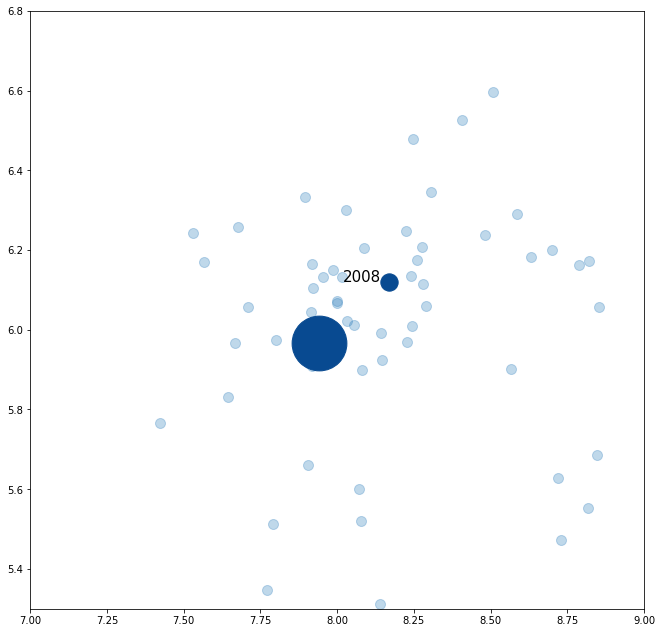

In [335]:

plt.rcParams["figure.figsize"]=(11,11)


c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 4)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 7)]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.18, 0.35, 5)]
# c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(0.4, 0, 5)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 5)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(0.9, 0.5,5)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
# c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]


# for i, name in enumerate(unique_affiliation_classified_government):
#     if name == '통일연구원':
#         if report.loc[i]['Year']==2009:
#             xs = embedding2[index_by_affiliation[name]][:,0]
#             ys = embedding2[index_by_affiliation[name]][:,1]
    
#             scatters=[plt.scatter(xs, ys, s=50,color=c_lst[i+2],label=name,alpha=0.3)]
        

xs = embedding2[report[report['Year']==2009].index][:,0]
ys = embedding2[report[report['Year']==2009].index][:,1]
scatters=[plt.scatter(xs, ys, s=100,color=c_lst[21+2],label=name,alpha=0.3)]
    
#=============================================================
# xs = embedding1[index_by_affiliation['통일연구원']][:,0]
# ys = embedding1[index_by_affiliation['통일연구원']][:,1] 
# scatters=[plt.scatter(xs, ys, s=9,color=c_lst[i],label=name,alpha=0.5)]

# xs = embedding1[22+23124][0]
# ys = embedding1[22+23124][1]
# scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[22],label=name,alpha=1)]
#=============================================================

for i,index in enumerate(range(len(report),len(report)+len(unique_affiliation_classified_government))):
    if unique_affiliation_classified_government[i]== '통일연구원':
        xs = embedding2[index][0]
        ys = embedding2[index][1]
        scatters = scatters+[plt.scatter(xs, ys, s=3000,color=c_lst[i],label=name,alpha=1)]
        
#     if (unique_affiliation_classified_government[i]== '통일연구원') &(report.loc[i]['Year']== 2009):
#         xs = embedding2[index][0]
#         ys = embedding2[index][1]
#         scatters = scatters+[plt.scatter(xs, ys, s=1500,color=c_lst[i],label=name,alpha=1)]

        
# for i,index in enumerate(range(len(report)+len(unique_affiliation_classified_government),len(report)+len(unique_affiliation_classified_government)+21)):

#     xs = embedding2[index][0]
#     ys = embedding2[index][1]
#     scatters = scatters+[plt.scatter(xs, ys, s=10,color=c_lst[21],label=name,alpha=1)]
    
# for i,index in enumerate(range(len(report)+len(unique_affiliation_classified_government),len(emb_vector_total))):
#     for j,inst in enumerate(unique_affiliation_classified_government):
#         xs = embedding2[index][0]
#         ys = embedding2[index][1]
#         scatters = scatters+[plt.scatter(xs, ys, s=10,color=c_lst[j],label=name,alpha=1)]
#     #plt.text(xs - 0.15,ys-0.35, 2000+i,fontsize=15,color='black')

s_point = len(report)+len(unique_affiliation_classified_government)
for j,inst in enumerate(unique_affiliation_classified_government):
    y_list = set(report[report['Institute']==inst]['Year'])
    for year in y_list:
        xs = embedding2[s_point][0]
        ys = embedding2[s_point][1]
#         if inst == '한국교육과정평가원':
        #scatters = scatters+[plt.scatter(xs, ys, s=20,color=c_lst[j],label=name,alpha=1)]
#         if (inst == '통일연구원')&(year==2020):
#             scatters = scatters+[plt.scatter(xs, ys, s=20,color=c_lst[j],label=name,alpha=1)]
#             plt.text(xs - 0.15,ys, year,fontsize=15,color='black')
        if (inst == '통일연구원')&(year==2008):
            scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[j],label=name,alpha=1)]
            plt.text(xs - 0.15,ys, year,fontsize=15,color='black')
#         if (inst == '통일연구원')&(year==2004):
#             scatters = scatters+[plt.scatter(xs, ys, s=20,color=c_lst[j],label=name,alpha=1)]
#             plt.text(xs - 0.15,ys, year,fontsize=15,color='black')
        
        s_point+=1



fs=17


# plt.xticks([]),plt.yticks([])
plt.xlim([7,9])
plt.ylim([5.3,6.8])
# plt.axis('off')
#plt.savefig('../../Data/Experiment/~1920/RESULT/KINU.pdf', bbox_inches='tight')
plt.show()

In [59]:
embedding2[0][0]

7.5578146

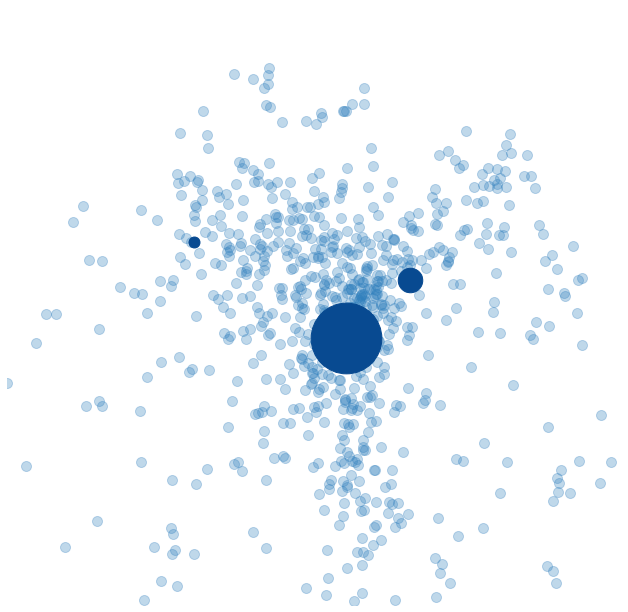

In [72]:

plt.rcParams["figure.figsize"]=(11,11)


c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 4)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 7)]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.18, 0.35, 5)]
# c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(0.4, 0, 5)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 5)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(0.9, 0.5,5)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
# c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]


for i, name in enumerate(unique_affiliation_classified_government):
    if name == '통일연구원':
        xs = embedding2[index_by_affiliation[name]][:,0]
        ys = embedding2[index_by_affiliation[name]][:,1]
        scatters=[plt.scatter(xs, ys, s=100,color=c_lst[i+2],label=name,alpha=0.3)]
# for i in report[(report['Year']==2009)&(report['Institute']=='통일연구원')].index:      
#     xs = embedding2[i][0]
#     ys = embedding2[i][1]
#     scatters=[plt.scatter(xs, ys, s=120,color=c_lst[21+2],label=name,alpha=1)]     
#     plt.text(xs ,ys, i,fontsize=15,color='black')
xs = embedding2[7975][0]
ys = embedding2[7975][1]
scatters=[plt.scatter(xs, ys, s=120,color=c_lst[21],label=name,alpha=1)]  

# xs = embedding2[report[report['Year']==2009].index][:,0]
# ys = embedding2[report[report['Year']==2009].index][:,1]
# scatters=[plt.scatter(xs, ys, s=50,color=c_lst[21+2],label=name,alpha=0.3)]
    
#=============================================================
# xs = embedding1[index_by_affiliation['통일연구원']][:,0]
# ys = embedding1[index_by_affiliation['통일연구원']][:,1] 
# scatters=[plt.scatter(xs, ys, s=9,color=c_lst[i],label=name,alpha=0.5)]

# xs = embedding1[22+23124][0]
# ys = embedding1[22+23124][1]
# scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[22],label=name,alpha=1)]
#=============================================================

for i,index in enumerate(range(len(report),len(report)+len(unique_affiliation_classified_government))):
    if unique_affiliation_classified_government[i]== '통일연구원':
        xs = embedding2[index][0]
        ys = embedding2[index][1]
        scatters = scatters+[plt.scatter(xs, ys, s=5000,color=c_lst[i],label=name,alpha=1)]
        
#     if (unique_affiliation_classified_government[i]== '통일연구원') &(report.loc[i]['Year']== 2009):
#         xs = embedding2[index][0]
#         ys = embedding2[index][1]
#         scatters = scatters+[plt.scatter(xs, ys, s=1500,color=c_lst[i],label=name,alpha=1)]

        
# for i,index in enumerate(range(len(report)+len(unique_affiliation_classified_government),len(report)+len(unique_affiliation_classified_government)+21)):

#     xs = embedding2[index][0]
#     ys = embedding2[index][1]
#     scatters = scatters+[plt.scatter(xs, ys, s=10,color=c_lst[21],label=name,alpha=1)]
    
# for i,index in enumerate(range(len(report)+len(unique_affiliation_classified_government),len(emb_vector_total))):
#     for j,inst in enumerate(unique_affiliation_classified_government):
#         xs = embedding2[index][0]
#         ys = embedding2[index][1]
#         scatters = scatters+[plt.scatter(xs, ys, s=10,color=c_lst[j],label=name,alpha=1)]
#     #plt.text(xs - 0.15,ys-0.35, 2000+i,fontsize=15,color='black')

s_point = len(report)+len(unique_affiliation_classified_government)
for j,inst in enumerate(unique_affiliation_classified_government):
    y_list = set(report[report['Institute']==inst]['Year'])
    for year in y_list:
        xs = embedding2[s_point][0]
        ys = embedding2[s_point][1]
#         if inst == '한국교육과정평가원':
        #scatters = scatters+[plt.scatter(xs, ys, s=20,color=c_lst[j],label=name,alpha=1)]
#         if (inst == '통일연구원')&(year==2020):
#             scatters = scatters+[plt.scatter(xs, ys, s=20,color=c_lst[j],label=name,alpha=1)]
#             plt.text(xs - 0.15,ys, year,fontsize=15,color='black')
        if (inst == '통일연구원')&(year==2008):
            scatters = scatters+[plt.scatter(xs, ys, s=600,color=c_lst[j],label=name,alpha=1)]
           
        s_point+=1



fs=17


plt.xticks([]),plt.yticks([])
plt.xlim([7,9.2])
plt.ylim([5.,6.7])
plt.axis('off')
plt.savefig('../../Data/Experiment/~1920/RESULT/KINU.pdf', bbox_inches='tight')
plt.show()